In [3]:
import sys
import xarray as xr
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import glob
from netCDF4 import Dataset
import cartopy.crs as ccrs
import os

import warnings
warnings.filterwarnings('ignore')

import pylab as plot
params = {'legend.fontsize': 20,
          'legend.handlelength': 2,
          'axes.titlesize' : 24,
          'axes.labelsize' : 20,
          'lines.linewidth' : 3,
          'lines.markersize' : 10,
          'xtick.labelsize' : 20,
          'ytick.labelsize' : 20}

plot.rcParams.update(params)

%matplotlib inline
%autosave 60

Autosaving every 60 seconds


In [4]:
# Some functions to make the plots

def mean_pspec(filenames,i,j):
    ''' Compute mean spectrum'''
    _pspec = []
    for filename in filenames:
        spec = np.load(filename)
        kspec = spec['kspec'];
        pspec = spec['KEspec'];
        _pspec.append(pspec) 
    pspec_ar = np.array(_pspec)
    mean_pspec = pspec_ar[i:j].mean(axis=0)
    return kspec,mean_pspec

def comp_slope(database,i,j):
    ''' Compute slope of avearged spectrum'''
    slope_10_100 = []
    slope_70_250 = []
    for box in boxes:
        filenames = sorted(glob.glob(database + 'KEspec/WaveSpec_'+box.name+'_KEspec_*.npz'))
        kpsec,pspec = mean_pspec(filenames,i,j)
        m1 = pp.get_slope(kpsec,pspec,10*1E3,100*1E3)
        m2 = pp.get_slope(kpsec,pspec,70*1E3,250*1E3)
        slope_10_100.append(m1)
        slope_70_250.append(m2)
    slope_10_100_arr = np.array(slope_10_100)
    slope_70_250_arr = np.array(slope_70_250)
    return slope_10_100_arr,slope_70_250_arr

In [7]:
def plot_wavenumber_box(box):
    fig, axs = plt.subplots(1,1, figsize=(18, 18))
    title = 'Annual Mean of KE spectrum : GS36 '
    plt.suptitle(title,size = 25,y=1.05)

    # - general slope
    k = np.array([1E-6,1E-3])
    s3 = k**-3/1.e11
    s2 = k**-2/1.e7
    s53 = k**(-5./3.)/1.e5

    MPC001_filenames = sorted(glob.glob('/scratch/cnt0024/hmg2840/albert7a/GS36-spec/GS36-MPC001-KEspec/WaveSpec_'+str(box)+'_KEspec_*.npz'))
    MPC001_kpsec,MPC001_pspec = mean_pspec(MPC001_filenames,0,12)
    axs.loglog(MPC001_pspec,MPC001_kpsec,'r',linewidth=2.0,label='GS36-75')
    MPC002_filenames = sorted(glob.glob('/scratch/cnt0024/hmg2840/albert7a/GS36-spec/GS36-MPC002-KEspec/WaveSpec_'+str(box)+'_KEspec_*.npz'))
    MPC002_kpsec,MPC002_pspec = mean_pspec(MPC002_filenames,0,12)
    axs.loglog(MPC002_kpsec,MPC002_pspec,'b',linewidth=2.0,label='GS36-150surf')
    MPC003_filenames = sorted(glob.glob('/scratch/cnt0024/hmg2840/albert7a/GS36-spec/GS36-MPC003-KEspec/WaveSpec_'+str(box)+'_KEspec_*.npz'))
    MPC003_kpsec,MPC003_pspec = mean_pspec(MPC003_filenames,0,12)
    axs.loglog(MPC003_kpsec,MPC003_pspec,'g',linewidth=2.0,label='GS36-150arctan')
    axs.loglog(k,s3,'k-',label=r'$k^{-3}$')
    axs.loglog(k,s2,'k-.',label=r'$k^{-2}$')
    axs.loglog(k,s53,'k--',label=r'$k^{-5/3}$')
    axs.set_xlim(1E-6,1E-3)
    axs.set_ylim(1E-4,1E5)
    axs.set_title(box,size=18)
    axs.legend()
    axs.grid(True)
    fig.tight_layout()

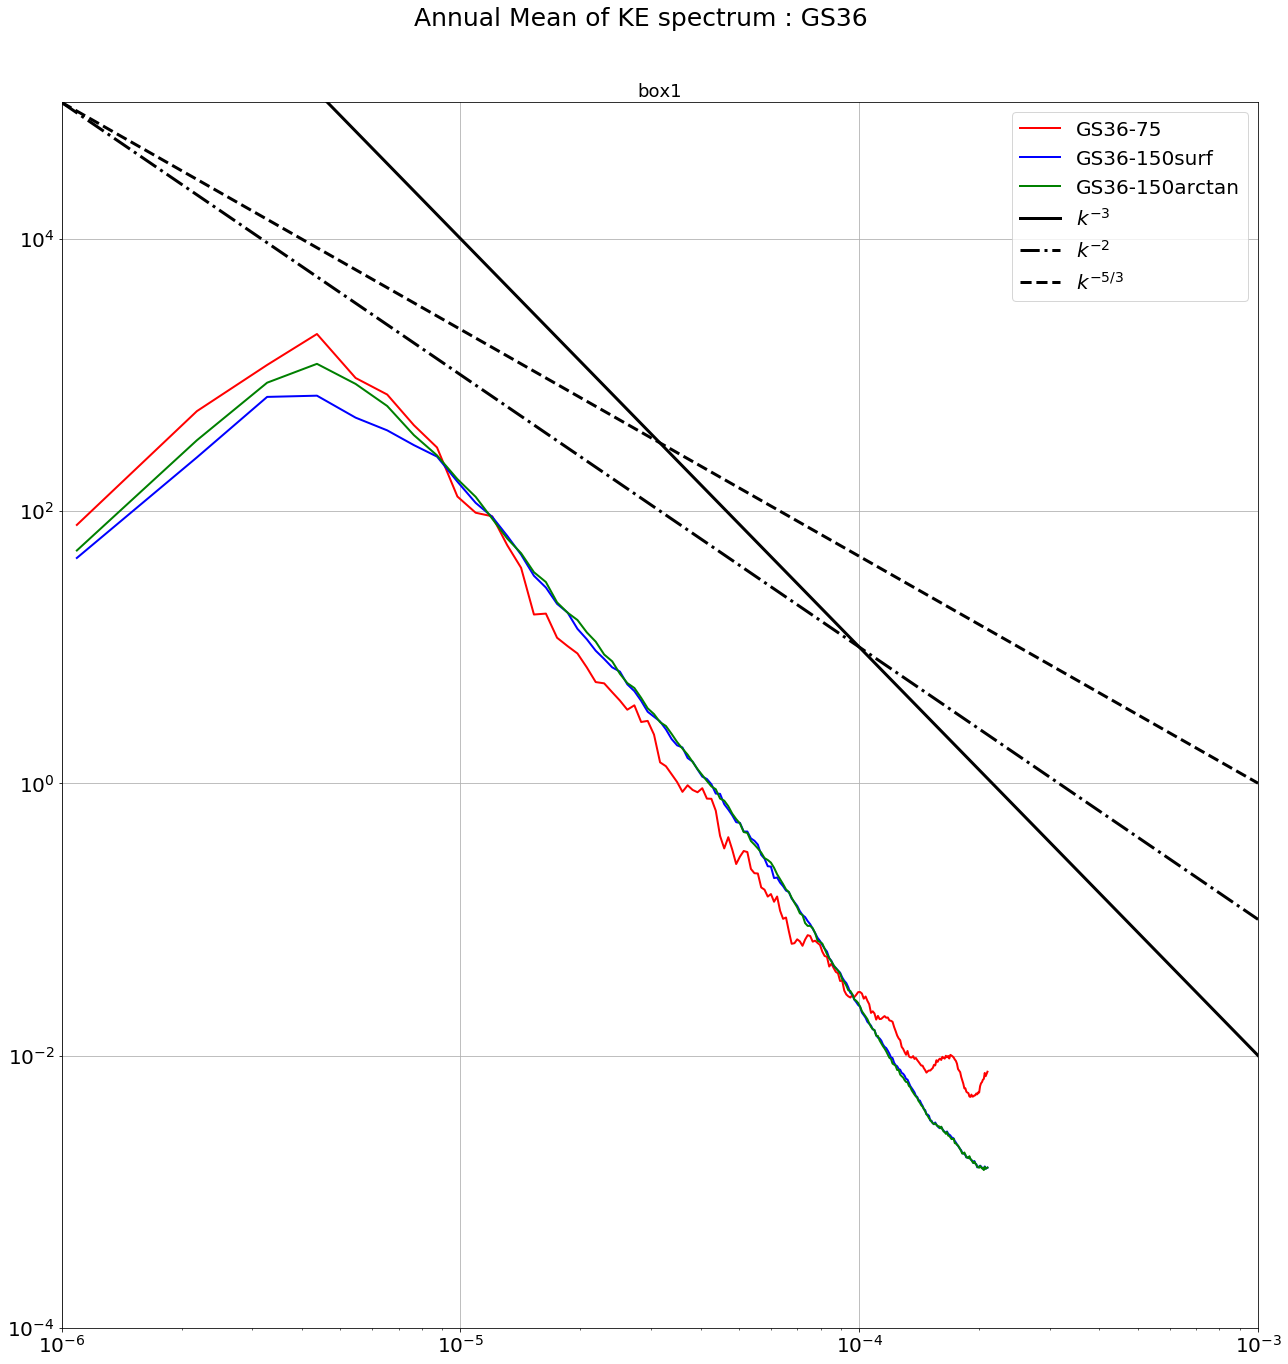

In [8]:
plot_wavenumber_box('box1')

In [9]:
def plot_wavenumber_eu(box):
    fig, axs = plt.subplots(1,1, figsize=(18, 18))
    title = 'Annual Mean of KE spectrum : EU36 '
    plt.suptitle(title,size = 25,y=1.05)

    # - general slope
    k = np.array([1E-6,1E-3])
    s3 = k**-3/1.e11
    s2 = k**-2/1.e7
    s53 = k**(-5./3.)/1.e5

    MPC001_filenames = sorted(glob.glob('/scratch/cnt0024/hmg2840/albert7a/EU36-spec/EU36-MPC001-KEspec/WaveSpec_'+str(box)+'_KEspec_*.npz'))
    MPC001_kpsec,MPC001_pspec = mean_pspec(MPC001_filenames,0,12)
    axs.loglog(MPC001_kpsec,MPC001_pspec,'r',linewidth=2.0,label='EU36-75')
    MPC002_filenames = sorted(glob.glob('/scratch/cnt0024/hmg2840/albert7a/EU36-spec/EU36-MPC002-KEspec/WaveSpec_'+str(box)+'_KEspec_*.npz'))
    MPC002_kpsec,MPC002_pspec = mean_pspec(MPC002_filenames,0,12)
    axs.loglog(MPC002_kpsec,MPC002_pspec,'b',linewidth=2.0,label='EU36-150surf')
    MPC003_filenames = sorted(glob.glob('/scratch/cnt0024/hmg2840/albert7a/EU36-spec/EU36-MPC003-KEspec/WaveSpec_'+str(box)+'_KEspec_*.npz'))
    MPC003_kpsec,MPC003_pspec = mean_pspec(MPC003_filenames,0,12)
    axs.loglog(MPC003_kpsec,MPC003_pspec,'g',linewidth=2.0,label='EU36-150arctan')
    axs.loglog(k,s3,'k-',label=r'$k^{-3}$')
    axs.loglog(k,s2,'k-.',label=r'$k^{-2}$')
    axs.loglog(k,s53,'k--',label=r'$k^{-5/3}$')
    axs.set_xlim(1E-6,1E-3)
    axs.set_ylim(1E-4,1E5)
    axs.set_title(box,size=18)
    axs.legend()
    axs.grid(True)
    fig.tight_layout()

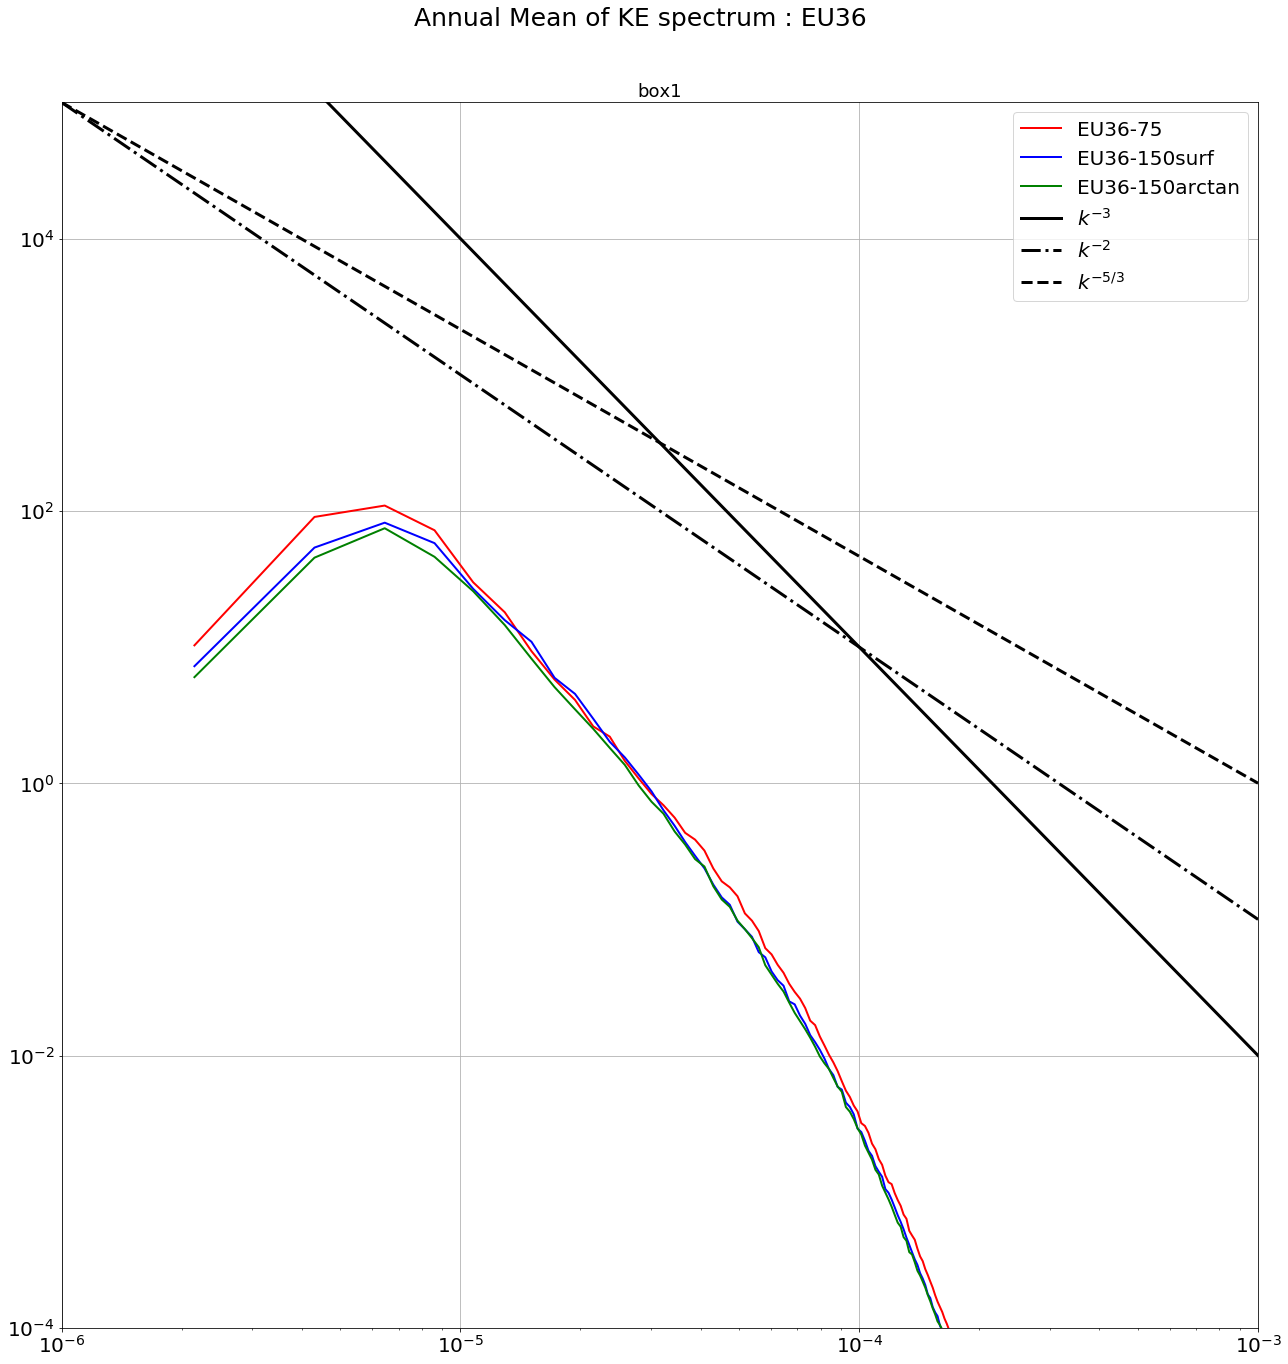

In [10]:
plot_wavenumber_eu('box1')